<a href="https://colab.research.google.com/github/nikunjchapadia/fastbook/blob/master/tabular_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#  

In [2]:
# Dataset with Continues and Categoorical Variables 

In [3]:
# # Vast majority of datasets can be best modeled with just two methods 
# 1. Ensembles of decision tree - 
# i.e. Random Forests and Graident Boosting Machines
# mainly for strectured data 

# 2. Multi layered neural networks learnt with SGD - 
# i.e. shallow and deep learning 
# mainly for unstructured data such as audio, vision, natural language 



In [4]:
# pytorch is not good choice for ensembles of decision tree 
# pytorch and fastai mainly designed for algorithms that do lots of 
# matrix multiplication & derivatives - deep learing 
# decision trees doesnt depends on matrix multiplcations and derivatives 


# whats the solution?
# sklearn - its good for machine learning models using approaches not covered
# by deep learning 
# for tabular data processing and quering - pandas 
# numpy - numeric programming libarary 

In [5]:
!pip install -Uqq fastbook kaggle waterfallcharts treeinterpreter dtreeviz
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 9.2 MB/s 
     |████████████████████████████████| 61 kB 503 bytes/s 
     |████████████████████████████████| 48 kB 1.5 MB/s 
     |████████████████████████████████| 1.2 MB 39.5 MB/s 
     |████████████████████████████████| 189 kB 39.5 MB/s 
     |████████████████████████████████| 56 kB 2.7 MB/s 
     |████████████████████████████████| 51 kB 185 kB/s 
     |████████████████████████████████| 558 kB 25.9 MB/s 
     |████████████████████████████████| 130 kB 57.1 MB/s 
Mounted at /content/gdrive


In [7]:
!pip install kaggle

In [9]:
creds = '{"username":"nikunjchapadia","key":"6b480094b7b76a4eebfe3738184224c7"}'

In [10]:
cred_path = Path('~/.kaggle/kaggle.json').expanduser()
if not cred_path.exists():
  cred_path.parent.mkdir(exist_ok=True)
  cred_path.write_text(creds)
  cred_path.chmod(0o600)

In [ ]:
from fastbook import *
from kaggle import api
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8

In [13]:
path = URLs.path('bluebook')
path

Path('/root/.fastai/archive/bluebook')

In [14]:
import shutil
if not path.exists():
    path.mkdir(parents=true)
    api.competition_download_cli('bluebook-for-bulldozers', path=path)
    # file_extract(path/'bluebook-for-bulldozers.zip')
    # !unzip /root/.fastai/archive/bluebook/bluebook-for-bulldozers.zip -d /root/.fastai/archive/bluebook
    shutil.unpack_archive('/root/.fastai/archive/bluebook/bluebook-for-bulldozers.zip', '/root/.fastai/archive/bluebook')

100%|██████████| 48.4M/48.4M [00:00<00:00, 114MB/s]


In [15]:
path.ls(file_type='text')

(#7) [Path('/root/.fastai/archive/bluebook/Machine_Appendix.csv'),Path('/root/.fastai/archive/bluebook/median_benchmark.csv'),Path('/root/.fastai/archive/bluebook/Valid.csv'),Path('/root/.fastai/archive/bluebook/ValidSolution.csv'),Path('/root/.fastai/archive/bluebook/random_forest_benchmark_test.csv'),Path('/root/.fastai/archive/bluebook/TrainAndValid.csv'),Path('/root/.fastai/archive/bluebook/Test.csv')]

In [16]:
path

Path('/root/.fastai/archive/bluebook')

In [17]:
path.ls()

(#15) [Path('/root/.fastai/archive/bluebook/Machine_Appendix.csv'),Path('/root/.fastai/archive/bluebook/Valid.zip'),Path('/root/.fastai/archive/bluebook/Train.7z'),Path('/root/.fastai/archive/bluebook/Train.zip'),Path('/root/.fastai/archive/bluebook/TrainAndValid.7z'),Path('/root/.fastai/archive/bluebook/bluebook-for-bulldozers.zip'),Path('/root/.fastai/archive/bluebook/median_benchmark.csv'),Path('/root/.fastai/archive/bluebook/TrainAndValid.zip'),Path('/root/.fastai/archive/bluebook/Data Dictionary.xlsx'),Path('/root/.fastai/archive/bluebook/Valid.csv')...]

In [18]:
temp_path = Path('/root/.fastai/archive/bluebook')
temp_path.ls()

(#15) [Path('/root/.fastai/archive/bluebook/Machine_Appendix.csv'),Path('/root/.fastai/archive/bluebook/Valid.zip'),Path('/root/.fastai/archive/bluebook/Train.7z'),Path('/root/.fastai/archive/bluebook/Train.zip'),Path('/root/.fastai/archive/bluebook/TrainAndValid.7z'),Path('/root/.fastai/archive/bluebook/bluebook-for-bulldozers.zip'),Path('/root/.fastai/archive/bluebook/median_benchmark.csv'),Path('/root/.fastai/archive/bluebook/TrainAndValid.zip'),Path('/root/.fastai/archive/bluebook/Data Dictionary.xlsx'),Path('/root/.fastai/archive/bluebook/Valid.csv')...]

In [19]:
import shutil

In [20]:
shutil.unpack_archive('/root/.fastai/archive/bluebook/bluebook-for-bulldozers.zip', '/root/.fastai/archive/bluebook')

In [21]:
Path('/root/.fastai/archive/bluebook').ls()


(#15) [Path('/root/.fastai/archive/bluebook/Machine_Appendix.csv'),Path('/root/.fastai/archive/bluebook/Valid.zip'),Path('/root/.fastai/archive/bluebook/Train.7z'),Path('/root/.fastai/archive/bluebook/Train.zip'),Path('/root/.fastai/archive/bluebook/TrainAndValid.7z'),Path('/root/.fastai/archive/bluebook/bluebook-for-bulldozers.zip'),Path('/root/.fastai/archive/bluebook/median_benchmark.csv'),Path('/root/.fastai/archive/bluebook/TrainAndValid.zip'),Path('/root/.fastai/archive/bluebook/Data Dictionary.xlsx'),Path('/root/.fastai/archive/bluebook/Valid.csv')...]

In [22]:
Path('/root/.fastai/archive/bluebook').ls(file_type="text")

(#7) [Path('/root/.fastai/archive/bluebook/Machine_Appendix.csv'),Path('/root/.fastai/archive/bluebook/median_benchmark.csv'),Path('/root/.fastai/archive/bluebook/Valid.csv'),Path('/root/.fastai/archive/bluebook/ValidSolution.csv'),Path('/root/.fastai/archive/bluebook/random_forest_benchmark_test.csv'),Path('/root/.fastai/archive/bluebook/TrainAndValid.csv'),Path('/root/.fastai/archive/bluebook/Test.csv')]

In [23]:
# !pip install kaggle


In [24]:
# creds = '{"username":"nikunjchapadia","key":"6b480094b7b76a4eebfe3738184224c7"}'

In [25]:
df = pd.read_csv(path/'TrainAndValid.csv', low_memory=False)

In [26]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [27]:
df['ProductSize'].unique()

array([nan, 'Medium', 'Small', 'Large / Medium', 'Mini', 'Large', 'Compact'], dtype=object)

In [28]:
sizes = 'Large','Large / Medium','Medium','Small','Mini','Compact'

In [29]:
df['ProductSize'] = df['ProductSize'].astype('category')
df['ProductSize'].cat.set_categories(sizes, ordered=True, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [30]:
dep_var = 'SalePrice'

In [31]:
df[dep_var] = np.log(df[dep_var])

In [32]:
df[dep_var]

0         11.097410
1         10.950807
2          9.210340
3         10.558414
4          9.305651
            ...    
412693     9.210340
412694     9.259131
412695     9.433484
412696     9.210340
412697     9.472705
Name: SalePrice, Length: 412698, dtype: float64

In [33]:
np.log(df[dep_var])

0         2.406712
1         2.393413
2         2.220327
3         2.356923
4         2.230622
            ...   
412693    2.220327
412694    2.225610
412695    2.244265
412696    2.220327
412697    2.248414
Name: SalePrice, Length: 412698, dtype: float64

In [35]:
11.097410, np.log(11.097410)

(11.09741, 2.4067117477584974)

In [ ]:
# Decision Trees

In [36]:
df = add_datepart(df, 'saledate')

In [37]:
df_test = pd.read_csv(path/'Test.csv', low_memory=False)
df_test = add_datepart(df_test, 'saledate')

In [38]:
' '.join(o for o in df.columns if o.startswith('sale'))

'saleYear saleMonth saleWeek saleDay saleDayofweek saleDayofyear saleIs_month_end saleIs_month_start saleIs_quarter_end saleIs_quarter_start saleIs_year_end saleIs_year_start saleElapsed'

In [39]:
# Using TabularPandas and TabularProc
procs = [Categorify, FillMissing]

In [58]:
cond = (df.saleYear < 2011) | (df.saleMonth < 11)
train_idx = np.where(cond)[0]
valid_idx = np.where(~cond)[0]
splits = (list(train_idx), list(valid_idx))
train_idx, valid_idx

(array([     0,      1,      2, ..., 412695, 412696, 412697]),
 array([ 23216,  23217,  23218, ..., 401120, 401121, 401122]))

In [59]:
# categorical and continues variables
cont, cat = cont_cat_split(df, 1, dep_var=dep_var)

In [60]:
to = TabularPandas(df, procs, cat, cont, y_names=dep_var, splits=splits)

In [61]:
len(to.train)

406944

In [62]:
len(to.valid)

5754

In [63]:
to.show(3)

,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,auctioneerID_na,MachineHoursCurrentMeter_na,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleElapsed,SalePrice
0,Low,521D,521,D,#na#,#na#,#na#,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,#na#,EROPS w AC,None or Unspecified,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,Conventional,False,False,False,False,False,False,False,False,1139246,999089,3157,121,3.0,2004,68.0,2006,11,46,16,3,320,1.163635e+09,11.097410
1,Low,950FII,950,F,II,#na#,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,#na#,EROPS w AC,None or Unspecified,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,23.5,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,Conventional,False,False,False,False,False,False,False,False,1139248,117657,77,121,3.0,1996,4640.0,2004,3,13,26,4,86,1.080259e+09,10.950807
2,High,226,226,#na#,#na#,#na#,#na#,Skid Steer Loader - 1351.0 to 1601.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,#na#,OROPS,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Auxiliary,#na#,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,None or Unspecified,Standard,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,False,False,False,False,False,False,False,False,1139249,434808,7009,121,3.0,2001,2838.0,2004,2,9,26,3,57,1.077754e+09,9.210340


In [66]:
to1 =  TabularPandas(
     df,
     procs,
    ['state', 'ProductGroup', 'Drive_System', 'Enclosure'],
    [],
    y_names=dep_var,
    splits=splits
    )
to1.show(3)

,state,ProductGroup,Drive_System,Enclosure,SalePrice
0,Alabama,WL,#na#,EROPS w AC,11.097410
1,North Carolina,WL,#na#,EROPS w AC,10.950807
2,New York,SSL,#na#,OROPS,9.210340


In [69]:
to.items.head(3)

,SalesID,SalePrice,MachineID,ModelID,...,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na
0,1139246,11.097410,999089,3157,...,1,1.163635e+09,1,1
1,1139248,10.950807,117657,77,...,1,1.080259e+09,1,1
2,1139249,9.210340,434808,7009,...,1,1.077754e+09,1,1


In [71]:
to1.items[['state', 'ProductGroup', 'Drive_System', 'Enclosure']].head(3)

,state,ProductGroup,Drive_System,Enclosure
0,1,6,0,3
1,33,6,0,3
2,32,3,0,6


In [72]:
to.classes['ProductSize']

['#na#', 'Large', 'Large / Medium', 'Medium', 'Small', 'Mini', 'Compact']

In [74]:
path

Path('/root/.fastai/archive/bluebook')

In [78]:
save_pickle(path/'to.pkl',to)

In [80]:
# create decision tree
to = load_pickle(path/'to.pkl')

In [82]:
xs, y = to.train.xs, to.train.y
valid_xs, valid_y = to.valid.xs, to.valid.y

In [83]:
m = DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs,y)

DecisionTreeRegressor(max_leaf_nodes=4)

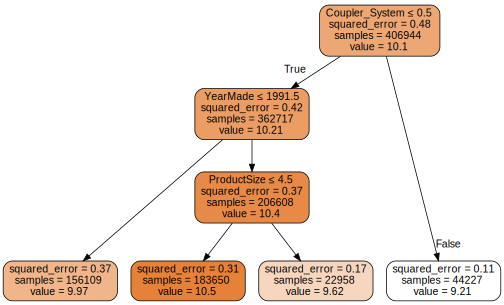

In [86]:
draw_tree(m,xs,size=7, leaves_parallel=True, precision=2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"
findfont: Font family ['DejaVu Sas'] not found. Falling back to DejaVu Sans.


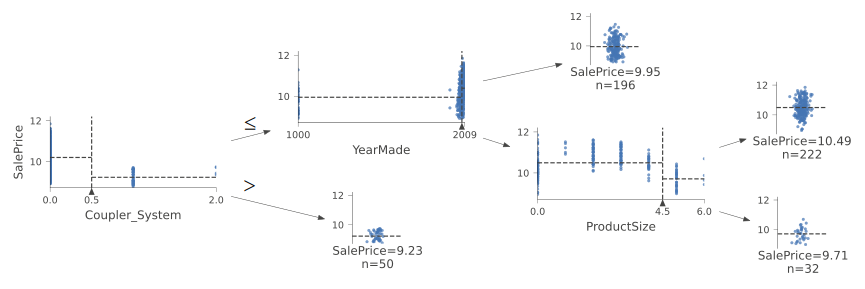

In [88]:
samp_idx = np.random.permutation(len(y))[:500]
dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var, fontname='DejaVu Sas', scale=1.6, label_fontsize=10, orientation='LR')

In [89]:
xs.loc[xs['YearMade'] < 1900, 'YearMade'] = 1950
valid_xs.loc[valid_xs['YearMade'] < 1900, 'YearMade'] = 1950

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


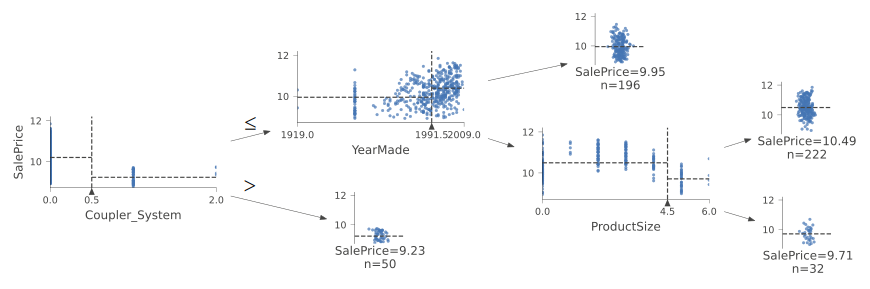

In [91]:
m = DecisionTreeRegressor(max_leaf_nodes=4).fit(xs,y)

dtreeviz(
    m,
    xs.iloc[samp_idx],
    y.iloc[samp_idx],
    xs.columns,
    dep_var,
    fontname='DejaVu Sans',
    scale=1.6,
    label_fontsize=10,
    orientation='LR')

In [92]:
m = DecisionTreeRegressor().fit(xs,y)

In [93]:
# root mean square error 
# model's root mean square error

def r_mse(pred, y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs,y): return r_mse(m.predict(xs), y)

In [94]:
m_rmse(m, xs, y)

0.0

In [95]:
m_rmse(m, valid_xs, valid_y)

0.341836

In [96]:
# seems like overfitting 
m.get_n_leaves(), len(xs)

(326316, 406944)